# Name of the Project

## Describe the core message or hypothesis for the project

## Describe the questions you and your group found interesting, and what motivated you to answer them

## Describe the data exploration and cleanup process

### Read in Data Sources and cleanup the data

In [77]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pprint import pprint

# Import stats for ttest analysis
import scipy.stats as stats

# Import API key
from api_keys import yelp_api_key
from yelpapi import YelpAPI
yelp_api = YelpAPI(yelp_api_key)

In [3]:
# Verify library versions if some error occurs

#pd.__version__ # Pandas version: 0.23.4
#np.__version__ # Numpy version: 1.15.4
#import matplotlib as mat
#mat.__version__ # Matplotlib version: 3.0.2

In [4]:
# Build URL
url = "https://chronicdata.cdc.gov/resource/mxg7-989n.json?"
topic = "topic=Obesity / Weight Status"
stratification_category = "stratificationcategoryid1=OVR"
question = "questionid=Q036"
query_url = f"{url}{topic}&{stratification_category}&{question}"

In [5]:
# Retrieve CDC obesity Data
responses = requests.get(query_url).json()

# Display the data
pprint(responses)

[{'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '25.4',
  'data_value_alt': '25.4',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-75.543970427, 42.827001032],
                  'type': 'Point'},
  'high_confidence_limit': '26.6',
  'locationabbr': 'NY',
  'locationdesc': 'New York',
  'locationid': '36',
  'low_confidence_limit': '24.2',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '8465',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2013',
  'yearstart': '2013'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '28.9',
  'data_value_alt': '28.9',
  'data_value_type': 'Va

  'classid': 'OWS',
  'data_value': '29.6',
  'data_value_alt': '29.6',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'high_confidence_limit': '29.8',
  'locationabbr': 'US',
  'locationdesc': 'National',
  'locationid': '59',
  'low_confidence_limit': '29.3',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '438479',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2016',
  'yearstart': '2016'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '37.3',
  'data_value_alt': '37.3',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-89.

  'low_confidence_limit': '28.5',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '2739',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2016',
  'yearstart': '2016'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '30.1',
  'data_value_alt': '30.1',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-120.155031326, 44.567449424],
                  'type': 'Point'},
  'high_confidence_limit': '31.8',
  'locationabbr': 'OR',
  'locationdesc': 'Oregon',
  'locationid': '41',
  'low_confidence_limit': '28.4',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
 

 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '29.6',
  'data_value_alt': '29.6',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-99.365720623, 41.641040988001],
                  'type': 'Point'},
  'high_confidence_limit': '30.7',
  'locationabbr': 'NE',
  'locationdesc': 'Nebraska',
  'locationid': '31',
  'low_confidence_limit': '28.4',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '16250',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2013',
  'yearstart': '2013'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '27',
  'data_value_alt': '27',
  'data_value_type': 'Va

  'sample_size': '5737',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2012',
  'yearstart': '2012'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '29.7',
  'data_value_alt': '29.7',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-147.722059036, 64.845079957001],
                  'type': 'Point'},
  'high_confidence_limit': '31.7',
  'locationabbr': 'AK',
  'locationdesc': 'Alaska',
  'locationid': '02',
  'low_confidence_limit': '27.8',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '4142',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
 

  'sample_size': '4884',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2017',
  'yearstart': '2017'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '28.9',
  'data_value_alt': '28.9',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'high_confidence_limit': '29.2',
  'locationabbr': 'US',
  'locationdesc': 'National',
  'locationid': '59',
  'low_confidence_limit': '28.6',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '425875',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total

  'yearstart': '2013'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '26.8',
  'data_value_alt': '26.8',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-111.763811277, 34.86597028],
                  'type': 'Point'},
  'high_confidence_limit': '29.4',
  'locationabbr': 'AZ',
  'locationdesc': 'Arizona',
  'locationid': '04',
  'low_confidence_limit': '24.3',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '4029',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2013',
  'yearstart': '2013'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '25.7',
  'data_value_alt': '25.7',
 

  'locationdesc': 'Virginia',
  'locationid': '51',
  'low_confidence_limit': '27.9',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '8030',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2015',
  'yearstart': '2015'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '32.7',
  'data_value_alt': '32.7',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-86.149960194, 39.766910452],
                  'type': 'Point'},
  'high_confidence_limit': '34',
  'locationabbr': 'IN',
  'locationdesc': 'Indiana',
  'locationid': '18',
  'low_confidence_limit': '31.6',
  'question': 'Percent of adults aged 18 years and 

  'yearstart': '2012'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '21.7',
  'data_value_alt': '21.7',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-77.031961127, 38.890371385],
                  'type': 'Point'},
  'high_confidence_limit': '24',
  'locationabbr': 'DC',
  'locationdesc': 'District of Columbia',
  'locationid': '11',
  'low_confidence_limit': '19.5',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '3787',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2014',
  'yearstart': '2014'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '22.7',
  'data_value_alt'

  'low_confidence_limit': '31.8',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '10325',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2013',
  'yearstart': '2013'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '26.4',
  'data_value_alt': '26.4',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-109.424420645, 47.066528972],
                  'type': 'Point'},
  'high_confidence_limit': '27.9',
  'locationabbr': 'MT',
  'locationdesc': 'Montana',
  'locationid': '30',
  'low_confidence_limit': '24.9',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',

  'geolocation': {'coordinates': [-99.365720623, 41.641040988001],
                  'type': 'Point'},
  'high_confidence_limit': '31.3',
  'locationabbr': 'NE',
  'locationdesc': 'Nebraska',
  'locationid': '31',
  'low_confidence_limit': '29.2',
  'question': 'Percent of adults aged 18 years and older who have obesity',
  'questionid': 'Q036',
  'sample_size': '21130',
  'stratification1': 'Total',
  'stratificationcategory1': 'Total',
  'stratificationcategoryid1': 'OVR',
  'stratificationid1': 'OVERALL',
  'topic': 'Obesity / Weight Status',
  'topicid': 'OWS1',
  'total': 'Total',
  'yearend': '2014',
  'yearstart': '2014'},
 {'class': 'Obesity / Weight Status',
  'classid': 'OWS',
  'data_value': '32.4',
  'data_value_alt': '32.4',
  'data_value_type': 'Value',
  'datasource': 'Behavioral Risk Factor Surveillance System',
  'datavaluetypeid': 'VALUE',
  'geolocation': {'coordinates': [-99.426770206, 31.827240407],
                  'type': 'Point'},
  'high_confidence_limit': '33

In [6]:
# Create lists to store CDC information

year_ovr = []
location_ovr = []
value_ovr = []

# Loop through items
for response in responses:
    try:
        year = response['yearstart']
        location = response['locationabbr']
        value = response['data_value']
    
        year_ovr.append(year)
        location_ovr.append(location)
        value_ovr.append(value)
    except KeyError:
        next

data_ovr = pd.DataFrame({'Year': year_ovr,
                         'Location': location_ovr,
                         'Obesity Percentage': value_ovr
                        })
data_ovr.head()

,Year,Location,Obesity Percentage
0,2013,NY,25.4
1,2013,ME,28.9
2,2016,WI,30.7
3,2016,NM,28.3
4,2016,NH,26.6


In [7]:
# Get data information
data_ovr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 3 columns):
Year                  374 non-null object
Location              374 non-null object
Obesity Percentage    374 non-null object
dtypes: object(3)
memory usage: 8.8+ KB


In [8]:
# Change Obesity Percentage data type to float
data_ovr["Obesity Percentage"] = data_ovr["Obesity Percentage"].astype(float)

# Change Year data type to 
data_ovr["Year"] = data_ovr["Year"].astype(int)


In [9]:
# Create dataframe just for States
df_states = data_ovr[data_ovr['Location'] != 'US']
df_states = df_states.reset_index(drop = True)

# Create dataframe for US
df_us = data_ovr[data_ovr['Location'] == 'US']
df_us = df_us.sort_values(by = 'Year')
df_us = df_us.reset_index(drop = True)

In [10]:
# Display States dataframe
df_states.head()

,Year,Location,Obesity Percentage
0,2013,NY,25.4
1,2013,ME,28.9
2,2016,WI,30.7
3,2016,NM,28.3
4,2016,NH,26.6


In [11]:
# Display US dataframe
df_us

,Year,Location,Obesity Percentage
0,2011,US,27.4
1,2012,US,27.7
2,2013,US,28.3
3,2014,US,28.9
4,2015,US,28.9
5,2016,US,29.6
6,2017,US,30.1


In [12]:
# Filter 2017 data for states
df_states_2017 = df_states[df_states["Year"] == 2017]

# Sort 2017 data to discover top Obsesity Percentage
df_states_2017 = df_states_2017.sort_values(by = 'Obesity Percentage', ascending = False)
df_states_2017 = df_states_2017.reset_index(drop = True)

In [13]:
# Display Top 5 States
df_states_2017.head()

,Year,Location,Obesity Percentage
0,2017,WV,38.1
1,2017,MS,37.3
2,2017,OK,36.5
3,2017,IA,36.4
4,2017,AL,36.3


In [14]:
# Display Bottom 5 States
df_states_2017.tail()

,Year,Location,Obesity Percentage
48,2017,UT,25.3
49,2017,CA,25.1
50,2017,HI,23.8
51,2017,DC,23.0
52,2017,CO,22.6


## Read in Obesity Percentage by Age Data 

In [15]:
# Build URL
url = "https://chronicdata.cdc.gov/resource/mxg7-989n.json?"
topic = "topic=Obesity / Weight Status"
stratification_category = "stratificationcategoryid1=AGEYR"
question = "questionid=Q036"
query_url = f"{url}{topic}&{stratification_category}&{question}"

In [16]:
# Retrieve CDC obesity Data
responses = requests.get(query_url).json()

In [17]:
# Create lists to store CDC information

year_ageyr = []
location_ageyr = []
value_ageyr = []
bins_ageyr = []

# Loop through items
for response in responses:
    try:
        year = response['yearstart']
        location = response['locationabbr']
        value = response['data_value']
        bins = response['stratification1']
    
        year_ageyr.append(year)
        location_ageyr.append(location)
        value_ageyr.append(value)
        bins_ageyr.append(bins)
    except KeyError:
        next

data_ageyr = pd.DataFrame({'Year': year_ageyr,
                           'Location': location_ageyr,
                           'Age Bin': bins_ageyr,
                           'Obesity Percentage': value_ageyr
                        })
data_ageyr.head()

,Year,Location,Age Bin,Obesity Percentage
0,2011,AL,25 - 34,35.2
1,2015,NY,35 - 44,29.7
2,2013,WA,45 - 54,33.3
3,2011,TN,55 - 64,32.5
4,2014,NM,25 - 34,33.2


In [18]:
# Get data information
data_ageyr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 4 columns):
Year                  994 non-null object
Location              994 non-null object
Age Bin               994 non-null object
Obesity Percentage    994 non-null object
dtypes: object(4)
memory usage: 31.1+ KB


In [19]:
# Change Obesity Percentage data type to float
data_ageyr["Obesity Percentage"] = data_ageyr["Obesity Percentage"].astype(float)

# Change Year data type to 
data_ageyr["Year"] = data_ageyr["Year"].astype(int)


In [20]:
# Create dataframe by age for US for 2017
df_ageyr_us = data_ageyr[(data_ageyr['Location'] == 'US') & (data_ageyr['Year'] == 2017)]
df_ageyr_us = df_ageyr_us.sort_values(by = 'Age Bin')
df_ageyr_us = df_ageyr_us.reset_index(drop = True)

In [21]:
# Display US dataframe
df_ageyr_us

,Year,Location,Age Bin,Obesity Percentage
0,2017,US,18 - 24,16.5
1,2017,US,35 - 44,33.0
2,2017,US,45 - 54,35.9
3,2017,US,55 - 64,35.4


## Describe the analysis process

### Plot US obesity data: overall and by age

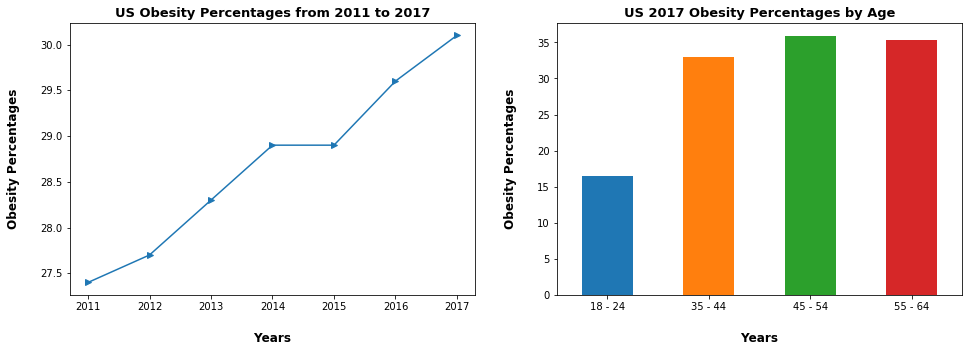

In [22]:
# Create subplot figure
fig, ax = plt.subplots(1, 2, figsize = (16,5))

# Plot data for US
df_us.plot(x = "Year", y = "Obesity Percentage", ax = ax[0], marker = ">", legend = None)
df_ageyr_us.plot(kind = 'bar', x = "Age Bin", y = "Obesity Percentage", ax = ax[1], legend = None)

# Insert labels
ax[0].set_title("US Obesity Percentages from 2011 to 2017", size = 13, weight = 'bold')
ax[0].set_xlabel("Years", labelpad=20, size = 12,  weight = 'bold')
ax[0].set_ylabel("Obesity Percentages", labelpad=20, size = 12, weight = 'bold')

ax[1].set_title("US 2017 Obesity Percentages by Age", size = 13, weight = 'bold')
ax[1].set_xlabel("Years", labelpad=20, size = 12,  weight = 'bold')
ax[1].set_xticklabels(df_ageyr_us["Age Bin"], rotation = 0)
ax[1].set_ylabel("Obesity Percentages", labelpad=20, size = 12, weight = 'bold')

plt.show()

### Plot obesity states rank: first 5 and last 5

/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


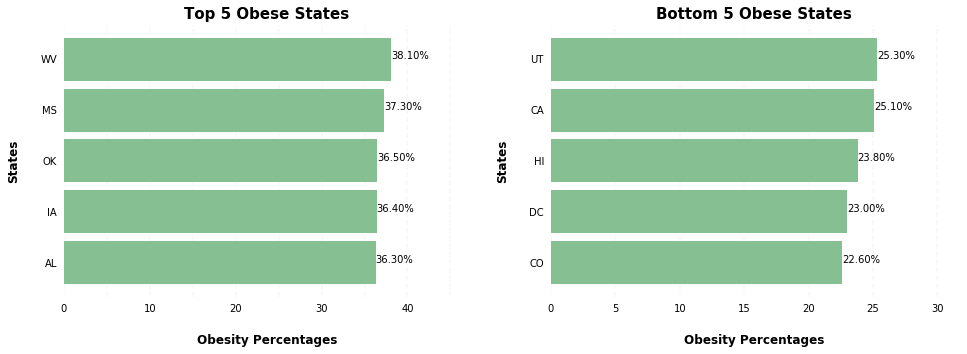

In [23]:
df_top5_states = df_states_2017.head().groupby('Location').sum()
df_top5_states = df_top5_states['Obesity Percentage'].sort_values()

df_bottom5_states = df_states_2017.tail().groupby('Location').sum()
df_bottom5_states = df_bottom5_states['Obesity Percentage'].sort_values()

fig, ax = plt.subplots(1,2, figsize= (16,5))

df_top5_states.plot(kind='barh', ax = ax[0], color='#86bf91', zorder=2, width=0.85)
df_bottom5_states.plot(kind='barh', ax = ax[1], color='#86bf91', zorder=2, width=0.85)

# Set Title
ax[0].set_title('Top 5 Obese States', weight = 'bold', size = 15, loc = 'center')
ax[1].set_title('Bottom 5 Obese States', weight = 'bold', size = 15, loc = 'center')

for i in range(len(ax)):

    # Remove plotting borders
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    # Switch off ticks
    ax[i].tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax[i].get_xticks()
    for tick in vals:
        ax[i].axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    ax[i].set_xlabel("Obesity Percentages", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax[i].set_ylabel("States", labelpad=20, weight='bold', size=12)

# Set values on right of the bars
[ax[0].text(v, j, '{:.2f}%'.format(v)) for j, v in enumerate(df_top5_states)]
[ax[1].text(v, j, '{:.2f}%'.format(v)) for j, v in enumerate(df_bottom5_states)]
        
plt.show()

### Analyze Healthy and Unhealthy Restaurants Ratings

In [24]:
# Set Top4 healthy and unhealthy restaurants
Top4_Unhealthy = ["McDonalds", "Wendys", "KFC", "Burger King"]
Top4_Healthy = ["Chiptole", "Subway", "Noodles&Company", "Panera"]

In [25]:
# Set list with states
states = df_states_2017["Location"].unique()

In [26]:
# Read in 20 restaurant ratings by unhealthy chain and state
rating = []
review_count = []
restaurant_name = []
restaurant_state = []

for state in states:
    for Unhealthy in Top4_Unhealthy:
        response = yelp_api.search_query(term=Unhealthy, location= state)
        for row in range (len(response["businesses"])):
            rating.append(response["businesses"][row]["rating"])
            review_count.append(response["businesses"][row]["review_count"])
            restaurant_name.append(Unhealthy)
            restaurant_state.append(state)

unhealthy_restaurants = pd.DataFrame({"Restaurant State": restaurant_state, "Restaurant Name": restaurant_name,
                                         "Restaurant Rating": rating, "Restaurant Review": review_count})

In [27]:
# Display dataframed
unhealthy_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,WV,McDonalds,1.5,12
1,WV,McDonalds,1.5,10
2,WV,McDonalds,1.5,7
3,WV,McDonalds,1.5,8
4,WV,McDonalds,1.5,3


In [28]:
# Read in 20 restaurant ratings by healthy chain and state
rating = []
review_count = []
restaurant_name = []
restaurant_state = []

for state in states:
    for Healthy in Top4_Healthy:
        response = yelp_api.search_query(term=Healthy, location= state)
        for row in range (len(response["businesses"])):
            rating.append(response["businesses"][row]["rating"])
            review_count.append(response["businesses"][row]["review_count"])
            restaurant_name.append(Healthy)
            restaurant_state.append(state)

healthy_restaurants = pd.DataFrame({"Restaurant State": restaurant_state, "Restaurant Name": restaurant_name,
                                         "Restaurant Rating": rating, "Restaurant Review": review_count})

In [29]:
# Display dataframe
healthy_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,WV,Subway,3.0,5
1,WV,Subway,1.5,3
2,WV,Subway,1.0,1
3,WV,Subway,4.5,3
4,WV,Subway,1.5,2


In [30]:
# Calculate rating average by state for unhealthy restaurants
unhealthy_restaurants_grp = unhealthy_restaurants.groupby("Restaurant State")
unhealthy_restaurants_avg = unhealthy_restaurants_grp["Restaurant Rating"].mean()
unhealthy = unhealthy_restaurants_avg.to_frame()
unhealthy.columns = ["Rating Average"]
unhealthy = unhealthy.reset_index() 
unhealthy.head()

,Restaurant State,Rating Average
0,AK,3.24375
1,AL,2.12500
2,AR,2.89375
3,AZ,1.96875
4,CA,2.31250


In [32]:
# Calculate rating average by state for healthy restaurants
healthy_restaurants_grp = healthy_restaurants.groupby("Restaurant State")
healthy_restaurants_avg = healthy_restaurants_grp["Restaurant Rating"].mean()
healthy = healthy_restaurants_avg.to_frame()
healthy.columns = ["Rating Average"]
healthy = healthy.reset_index() 
healthy.head()

,Restaurant State,Rating Average
0,AK,3.585366
1,AL,3.522727
2,AR,3.378049
3,AZ,3.206250
4,CA,3.159574


In [33]:
# Merge states dataframe and unhealthy dataframe
state_unhealthy = pd.merge(df_states_2017, unhealthy, left_on = 'Location', right_on = 'Restaurant State')
state_unhealthy = state_unhealthy.drop('Restaurant State', axis = 1)
state_unhealthy.head()

,Year,Location,Obesity Percentage,Rating Average
0,2017,WV,38.1,3.10625
1,2017,MS,37.3,2.91875
2,2017,OK,36.5,2.21875
3,2017,IA,36.4,3.01250
4,2017,AL,36.3,2.12500


In [34]:
# Merge states dataframe and healthy dataframe
state_healthy = pd.merge(df_states_2017, healthy, left_on = 'Location', right_on = 'Restaurant State')
state_healthy = state_healthy.drop('Restaurant State', axis = 1)
state_healthy.head()

,Year,Location,Obesity Percentage,Rating Average
0,2017,WV,38.1,3.525000
1,2017,MS,37.3,3.170732
2,2017,OK,36.5,3.600000
3,2017,IA,36.4,3.595745
4,2017,AL,36.3,3.522727


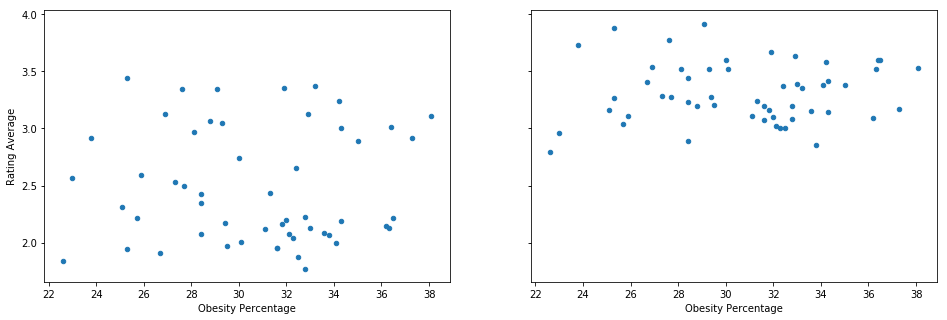

In [35]:
# Scatter plots
fig, ax = plt.subplots(1,2, figsize= (16,5), sharey = True)

state_unhealthy.plot(kind='scatter', x = 'Obesity Percentage', y = 'Rating Average', ax = ax[0])
state_healthy.plot(kind='scatter', x = 'Obesity Percentage', y = 'Rating Average', ax = ax[1])

### Analyze restaurants (health and unhealth) yelp data for the 5 first and last states

In [36]:
# Select states to analyze
Top5_states = df_top5_states.index
Bottom5_states = df_bottom5_states.index

In [37]:
# Read in Unhealthy restaurants for Top 5 states
rating = []
review_count = []
restaurant_name = []
restaurant_state = []

for state in Top5_states:
    for Unhealthy in Top4_Unhealthy:
        response = yelp_api.search_query(term=Unhealthy, location= state)
        for row in range (len(response["businesses"])):
            rating.append(response["businesses"][row]["rating"])
            review_count.append(response["businesses"][row]["review_count"])
            restaurant_name.append(Unhealthy)
            restaurant_state.append(state)

TOP5UNHEALTHY_restaurants = pd.DataFrame({"Restaurant State": restaurant_state, "Restaurant Name": restaurant_name,
                                         "Restaurant Rating": rating, "Restaurant Review": review_count})

In [38]:
TOP5UNHEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,AL,McDonalds,1.5,8
1,AL,McDonalds,1.5,29
2,AL,McDonalds,1.5,31
3,AL,McDonalds,1.5,19
4,AL,McDonalds,1.5,18


In [39]:
# Read in Unhealthy restaurants for Bottom 5 states
rating = []
review_count = []
restaurant_name = []
restaurant_state = []

for state in Bottom5_states:
    for Unhealthy in Top4_Unhealthy:
        response = yelp_api.search_query(term=Unhealthy, location= state)
        for row in range (len(response["businesses"])):
            rating.append(response["businesses"][row]["rating"])
            review_count.append(response["businesses"][row]["review_count"])
            restaurant_name.append(Unhealthy)
            restaurant_state.append(state)

BOTTOM5UNHEALTHY_restaurants = pd.DataFrame({"Restaurant State": restaurant_state, "Restaurant Name": restaurant_name,
                                         "Restaurant Rating": rating, "Restaurant Review": review_count})

In [40]:
BOTTOM5UNHEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,CO,McDonalds,2.0,57
1,CO,McDonalds,1.5,44
2,CO,McDonalds,1.5,41
3,CO,McDonalds,2.0,46
4,CO,McDonalds,2.5,5


In [41]:
# Read in Healthy restaurants for Top 5 states
rating = []
review_count = []
restaurant_name = []
restaurant_state = []

for state in Top5_states:
    for Healthy in Top4_Healthy:
        response = yelp_api.search_query(term=Healthy, location= state)
        for row in range (len(response["businesses"])):
            rating.append(response["businesses"][row]["rating"])
            review_count.append(response["businesses"][row]["review_count"])
            restaurant_name.append(Healthy)
            restaurant_state.append(state)

TOP5HEALTHY_restaurants = pd.DataFrame({"Restaurant State": restaurant_state, "Restaurant Name": restaurant_name,
                                         "Restaurant Rating": rating, "Restaurant Review": review_count})

In [42]:
TOP5HEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,AL,Chiptole,3.0,206
1,AL,Subway,4.0,4
2,AL,Subway,1.0,2
3,AL,Subway,2.5,5
4,AL,Subway,4.0,5


In [43]:
# Read in Healthy restaurants for Bottom 5 states
rating = []
review_count = []
restaurant_name = []
restaurant_state = []

for state in Bottom5_states:
    for Healthy in Top4_Healthy:
        response = yelp_api.search_query(term=Healthy, location= state)
        for row in range (len(response["businesses"])):
            rating.append(response["businesses"][row]["rating"])
            review_count.append(response["businesses"][row]["review_count"])
            restaurant_name.append(Healthy)
            restaurant_state.append(state)

BOTTOM5HEALTHY_restaurants = pd.DataFrame({"Restaurant State": restaurant_state, "Restaurant Name": restaurant_name,
                                         "Restaurant Rating": rating, "Restaurant Review": review_count})

In [44]:
BOTTOM5HEALTHY_restaurants.head()

,Restaurant State,Restaurant Name,Restaurant Rating,Restaurant Review
0,CO,Chiptole,3.5,84
1,CO,Chiptole,3.0,44
2,CO,Chiptole,3.5,25
3,CO,Chiptole,3.0,32
4,CO,Chiptole,3.5,39


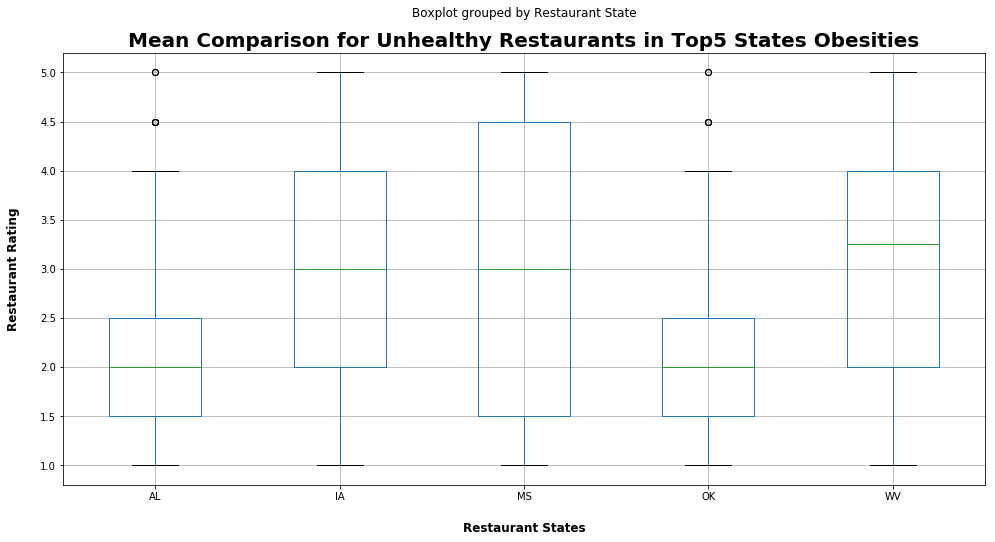

In [76]:
# Create a boxplot to compare means for Unhealthy Restaurants in Top5 States
TOP5UNHEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", figsize=(16, 8))

plt.title("Mean Comparison for Unhealthy Restaurants in Top5 States Obesities",weight = 'bold', size = 20, loc = 'center')
plt.xlabel("Restaurant States", labelpad=20, weight='bold', size=12)
plt.ylabel("Restaurant Rating", labelpad=20, weight='bold', size=12)

plt.show()

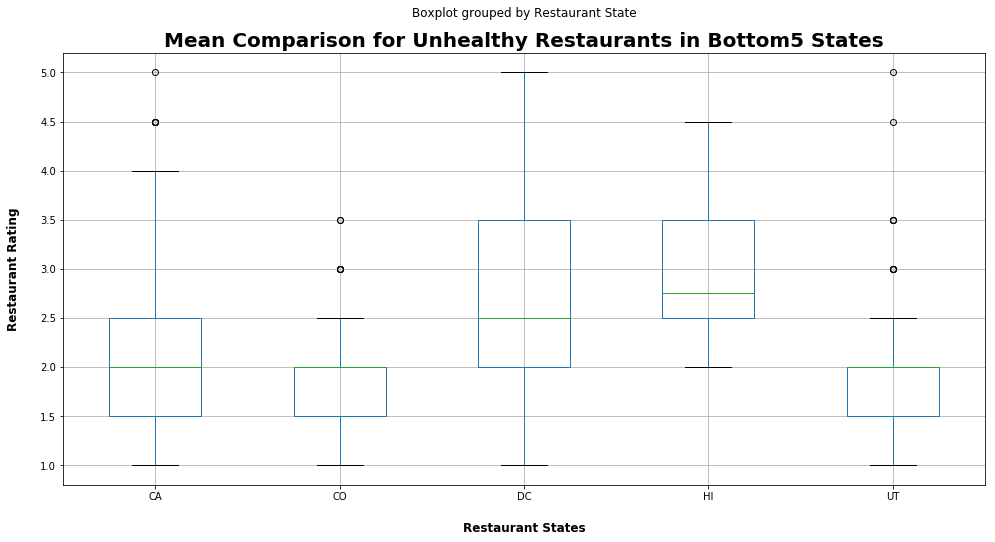

In [73]:
# Create a boxplot to compare means for Unhealthy Restaurants in Bottom5 States
BOTTOM5UNHEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", figsize=(16, 8))

plt.title("Mean Comparison for Unhealthy Restaurants in Bottom5 States Obesities",weight = 'bold', size = 20, loc = 'center')
plt.xlabel("Restaurant States", labelpad=20, weight='bold', size=12)
plt.ylabel("Restaurant Rating", labelpad=20, weight='bold', size=12)

plt.show()

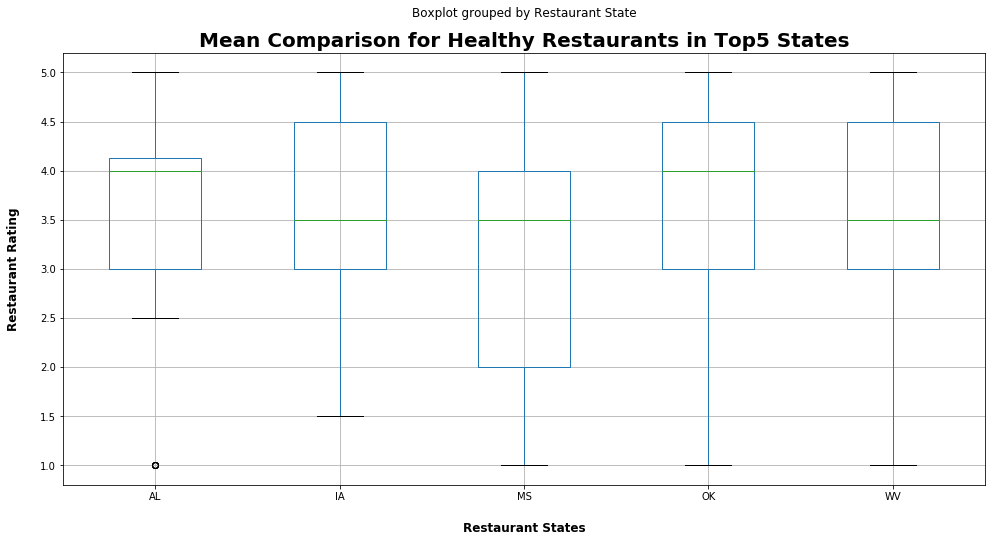

In [75]:
# Create a boxplot to compare means for Healthy Restaurants in Top5 States
TOP5HEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", figsize=(16, 8))

plt.title("Mean Comparison for Healthy Restaurants in Top5 States Obesities",weight = 'bold', size = 20, loc = 'center')
plt.xlabel("Restaurant States", labelpad=20, weight='bold', size=12)
plt.ylabel("Restaurant Rating", labelpad=20, weight='bold', size=12)

plt.show()

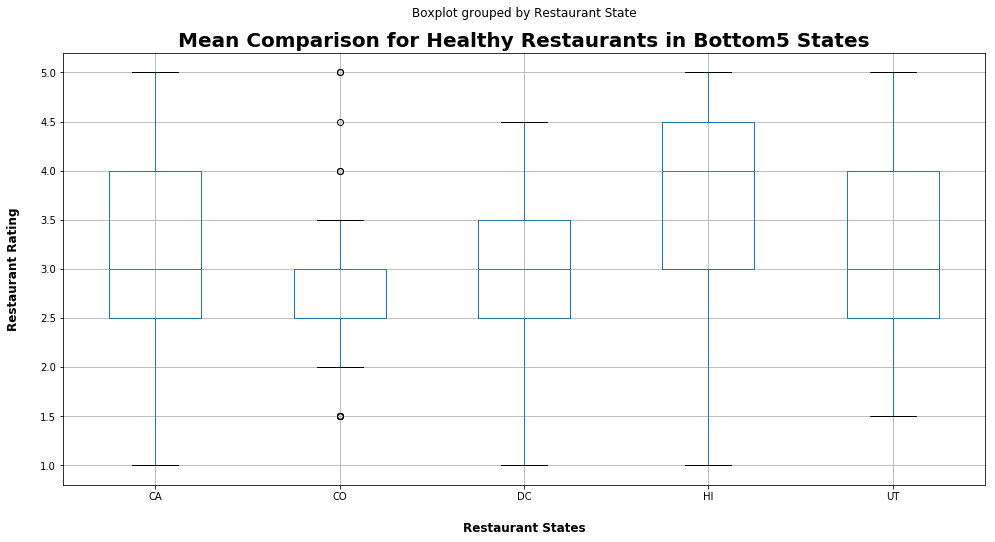

In [74]:
# Create a boxplot to compare means for Healthy Restaurants in Bottom5 States
BOTTOM5HEALTHY_restaurants.boxplot("Restaurant Rating", by="Restaurant State", figsize=(16, 8))

plt.title("Mean Comparison for Healthy Restaurants in Bottom5 States Obesities",weight = 'bold', size = 20, loc = 'center')
plt.xlabel("Restaurant States", labelpad=20, weight='bold', size=12)
plt.ylabel("Restaurant Rating", labelpad=20, weight='bold', size=12)

plt.show()

In [79]:
# NUll hypothesis: Unhealthy and Healthy Restaurants in Top5 Obese States have the same Ratings
# Test if the ratings are different
stats.ttest_ind(TOP5HEALTHY_restaurants["Restaurant Rating"], TOP5UNHEALTHY_restaurants["Restaurant Rating"], equal_var=False)

Ttest_indResult(statistic=8.422368982367946, pvalue=4.3142602946941774e-16)

In [80]:
# NUll hypothesis: Unhealthy and Healthy Restaurants in Bottom5 Obese States have the same Ratings
# Test if the ratings are different
stats.ttest_ind(BOTTOM5HEALTHY_restaurants["Restaurant Rating"], BOTTOM5UNHEALTHY_restaurants["Restaurant Rating"], equal_var=False)

Ttest_indResult(statistic=12.763908888899497, pvalue=1.0459954058623215e-33)

In [82]:
# NUll hypothesis: Unhealthy Restaurants in Top5 Obese States and Bottom5 Obese States have the same Ratings
# Test if the ratings are different
stats.ttest_ind(TOP5UNHEALTHY_restaurants["Restaurant Rating"], BOTTOM5UNHEALTHY_restaurants["Restaurant Rating"], equal_var=False)

Ttest_indResult(statistic=4.8388646044411185, pvalue=1.5946311945445406e-06)

In [83]:
# NUll hypothesis: Healthy Restaurants in Top5 Obese States and Bottom5 Obese States have the same Ratings
# Test if the ratings are different
stats.ttest_ind(TOP5HEALTHY_restaurants["Restaurant Rating"], BOTTOM5HEALTHY_restaurants["Restaurant Rating"], equal_var=False)

Ttest_indResult(statistic=3.760247864603215, pvalue=0.00019565444226276552)